In [1]:
import numpy as np


In [2]:
import matplotlib.pyplot as plt

In [3]:
# linear condition
np.random.seed(225)
data_x = np.linspace(-10.0,10.0,100)[:, np.newaxis]
data_y = 29*data_x + 10* np.random.randn(100,1)
data_x =data_x/np.max(data_x)
data_x

array([[-1.        ],
       [-0.97979798],
       [-0.95959596],
       [-0.93939394],
       [-0.91919192],
       [-0.8989899 ],
       [-0.87878788],
       [-0.85858586],
       [-0.83838384],
       [-0.81818182],
       [-0.7979798 ],
       [-0.77777778],
       [-0.75757576],
       [-0.73737374],
       [-0.71717172],
       [-0.6969697 ],
       [-0.67676768],
       [-0.65656566],
       [-0.63636364],
       [-0.61616162],
       [-0.5959596 ],
       [-0.57575758],
       [-0.55555556],
       [-0.53535354],
       [-0.51515152],
       [-0.49494949],
       [-0.47474747],
       [-0.45454545],
       [-0.43434343],
       [-0.41414141],
       [-0.39393939],
       [-0.37373737],
       [-0.35353535],
       [-0.33333333],
       [-0.31313131],
       [-0.29292929],
       [-0.27272727],
       [-0.25252525],
       [-0.23232323],
       [-0.21212121],
       [-0.19191919],
       [-0.17171717],
       [-0.15151515],
       [-0.13131313],
       [-0.11111111],
       [-0

# non-linear condition
np.random.seed(225)
data_x = np.linspace(-10.0,10.0,100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1* np.power(data_x,2)+0.5* np.random.randn(100,1)

data_x =data_x/np.max(data_x)
data_x

In [4]:
data_x = np.hstack((np.ones_like(data_x),data_x))
data_x

array([[ 1.        , -1.        ],
       [ 1.        , -0.97979798],
       [ 1.        , -0.95959596],
       [ 1.        , -0.93939394],
       [ 1.        , -0.91919192],
       [ 1.        , -0.8989899 ],
       [ 1.        , -0.87878788],
       [ 1.        , -0.85858586],
       [ 1.        , -0.83838384],
       [ 1.        , -0.81818182],
       [ 1.        , -0.7979798 ],
       [ 1.        , -0.77777778],
       [ 1.        , -0.75757576],
       [ 1.        , -0.73737374],
       [ 1.        , -0.71717172],
       [ 1.        , -0.6969697 ],
       [ 1.        , -0.67676768],
       [ 1.        , -0.65656566],
       [ 1.        , -0.63636364],
       [ 1.        , -0.61616162],
       [ 1.        , -0.5959596 ],
       [ 1.        , -0.57575758],
       [ 1.        , -0.55555556],
       [ 1.        , -0.53535354],
       [ 1.        , -0.51515152],
       [ 1.        , -0.49494949],
       [ 1.        , -0.47474747],
       [ 1.        , -0.45454545],
       [ 1.        ,

In [5]:
order = np.random.permutation(len(data_x))
order
portion =20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]

train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]

print(test_x ,test_y ,train_x,train_y)
print(test_x.size ,test_y.size ,train_x.size,train_y.size)

[[ 1.          0.37373737]
 [ 1.         -0.19191919]
 [ 1.          0.45454545]
 [ 1.         -0.81818182]
 [ 1.          0.57575758]
 [ 1.          0.91919192]
 [ 1.          0.33333333]
 [ 1.         -0.45454545]
 [ 1.         -0.57575758]
 [ 1.         -1.        ]
 [ 1.         -0.25252525]
 [ 1.         -0.65656566]
 [ 1.         -0.5959596 ]
 [ 1.         -0.07070707]
 [ 1.          0.47474747]
 [ 1.          0.93939394]
 [ 1.          0.49494949]
 [ 1.          0.6969697 ]
 [ 1.          0.85858586]
 [ 1.          0.51515152]] [[ 103.39686288]
 [ -51.3362136 ]
 [ 133.2918598 ]
 [-240.91217713]
 [ 169.52994391]
 [ 287.33447321]
 [  92.00666534]
 [-135.96744106]
 [-178.02312857]
 [-286.89989773]
 [ -82.51536624]
 [-195.41007147]
 [-168.21495783]
 [ -42.61473109]
 [ 139.0079694 ]
 [ 249.67955069]
 [ 135.43019595]
 [ 227.47261822]
 [ 261.70417126]
 [ 169.48847022]] [[ 1.         -0.39393939]
 [ 1.          0.19191919]
 [ 1.         -0.75757576]
 [ 1.         -0.05050505]
 [ 1.     

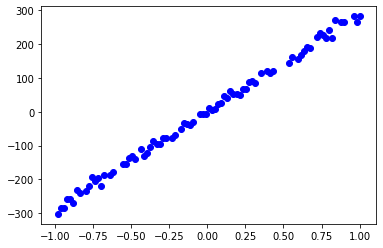

In [6]:
plt.scatter(train_x[:,1],train_y,c ="b",label="Data")
plt.show()

In [7]:
# linear condition
def get_gradient(theta,x,y):
    y_estimate = (x).dot(theta).flatten()
    error = (y_estimate - y.flatten())
    mse = (1.0/len(x))*np.sum(np.power(error,2))
    gradient = (1.0/len(x))* error.dot(x)
    return gradient, mse
    
    

theta = np.random.randn(2)
alpha = 0.25
tolerance = 1e-3
print("Intial values of Weights:")
print(theta[1],theta[0])
#perform Gradient Descent
iterations = 1
while True:
    gradient, error = get_gradient(theta,train_x,train_y)
    new_theta = theta -alpha*gradient
    #print (gradient)
    
    # stopping condition
    if np.sum(abs(new_theta-theta))<tolerance:
        print("Converged")
        break
    
    # Print error every 10 iterations 
    if iterations % 10 ==0:
        print("Iteration : %d - Error: %.4f"%(iterations,error))
        print("Updated Weights : {:f}, {:f}".format(theta[1],theta[0]))
    iterations+=1
    theta = new_theta
        
print('final weights : {:f},{:f}'.format(theta[1],theta[0]))
print("Test Cost= ",get_gradient(theta,train_x,train_y)[1])

Intial values of Weights:
0.9908275646320475 0.27355061888057075
Iteration : 10 - Error: 5917.2434
Updated Weights : 156.320022, -3.183059
Iteration : 20 - Error: 1145.2715
Updated Weights : 232.891369, -1.010285
Iteration : 30 - Error: 290.0851
Updated Weights : 265.298566, 0.170253
Iteration : 40 - Error: 136.8094
Updated Weights : 279.017828, 0.684676
Iteration : 50 - Error: 109.3376
Updated Weights : 284.825943, 0.903282
Iteration : 60 - Error: 104.4138
Updated Weights : 287.284847, 0.995876
Iteration : 70 - Error: 103.5313
Updated Weights : 288.325841, 1.035079
Iteration : 80 - Error: 103.3731
Updated Weights : 288.766553, 1.051676
Iteration : 90 - Error: 103.3448
Updated Weights : 288.953132, 1.058703
Iteration : 100 - Error: 103.3397
Updated Weights : 289.032121, 1.061677
Iteration : 110 - Error: 103.3388
Updated Weights : 289.065562, 1.062937
Converged
final weights : 289.078786,1.063435
Test Cost=  103.33862790085595


# non-linear condition
def get_gradient(theta,x,y):
    y_estimate = (x**2).dot(theta).flatten()
    error = np.sum(y_estimate - y.flatten() )
    mse = (1.0/len(x))*np.sum(np.power(y_estimate - y.flatten(),2))
    gradient = (1.0/len(x))* error.dot(x**2)
    return gradient, mse

theta = np.random.randn(2)
alpha = 0.25
tolerance = 1e-3
print("Intial values of Weights:")
print(theta[1],theta[0])
#perform Gradient Descent
iterations = 1
while True:
    gradient,error = get_gradient(theta,train_x,train_y)
    new_theta = theta -alpha*gradient
    #print (gradient)
    
    # stopping condition
    if np.sum(abs(new_theta-theta))<tolerance:
        print("Converged")
        break
    
    # Print error every 10 iterations 
    if iterations % 10 ==0:
        print("Iteration : %d - Error: %.4f"%(iterations,error))
        print("Updated Weights : {:f}, {:f}".format(theta[1],theta[0]))
    iterations+=1
    theta = new_theta
        
print('final weights : {:f},{:f}'.format(theta[1],theta[0]))
print("Test Cost= ",get_gradient(theta,train_x,train_y)[1])

In [8]:
# Linear condition
print("Final equ / hypothesis looks like:")
print("y = {:f}.x +  {:f}".format(theta[1],theta[0]))

Final equ / hypothesis looks like:
y = 289.078786.x +  1.063435


In [25]:
y_pre  = (289.078786*(data_x[:,1,]) +  1.063435)

#non- Linear condition
print("Final equ / hypothesis looks like:")
print("y = {:f}.(x**2) +  {:f}".format(theta[1],theta[0]))

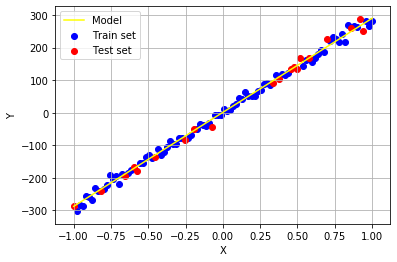

In [26]:
# linear condition
plt.plot(data_x[:,1,], y_pre, c ="yellow", label = "Model")
plt.scatter(train_x[:,1,], train_y, c ="b", label = "Train set")
plt.scatter(test_x[:,1,], test_y, c ="red", label = "Test set")
plt.grid()
plt.legend(loc="best")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



In [ ]:
# non-linear condition
plt.plot(data_x[:,1,], (data_x**2).dot(theta), c ="g", label = "Model")
plt.scatter(train_x[:,1,], train_y, c ="b", label = "Train set")
plt.scatter(test_x[:,1,], test_y, c ="r", label = "Test set")
plt.grid()
plt.legend(loc="best")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
